In [5]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


With object oriented

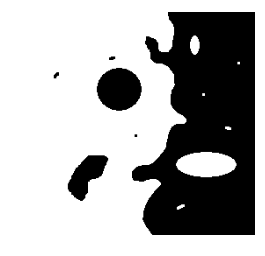

In [12]:
testdata_images_path = '../tests/images/Binary/'
testdata_features_path = '../tests/features/Binary/'

image = cv2.imread(os.path.join(testdata_images_path, 'Binary_all_types_noise.png'), cv2.IMREAD_GRAYSCALE)
holes_true, islands_true, indents_true,  prots_true = \
    sr.read_matfile(os.path.join(testdata_features_path, 'Binary_all_types_noise_binregions.mat'), visualize=False)
sr.show_image(image)

In [13]:
SE = sio.loadmat(os.path.join(testdata_features_path,"SE_neighb_all_other.mat"))['SE_n']
lam = 50
area_factor = 0.05
connectivity = 4
binarydetector = sr.BinaryDetector(SE=SE, lam=lam, area_factor=area_factor, 
                                                connectivity=connectivity)

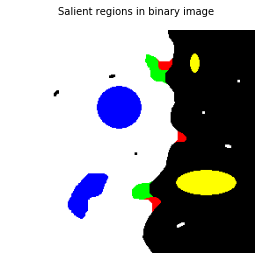

In [14]:
results = binarydetector.detect(image, find_holes=True, find_islands=True,
       find_indentations=True, find_protrusions=True, visualize=True)

In [15]:
holes_my = results['holes']
islands_my = results['islands']
indents_my = results['indentations']
prots_my = results['protrusions']

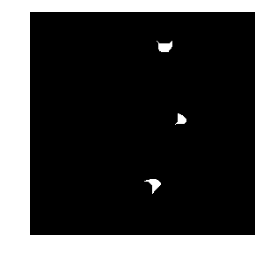

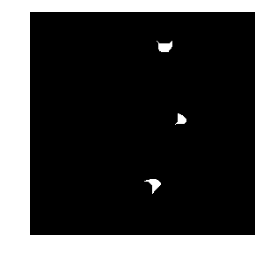

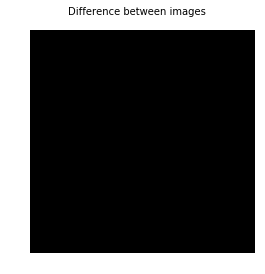

True

In [16]:
sr.show_image(prots_my)
sr.show_image(prots_true)
sr.image_diff(prots_my, prots_true)

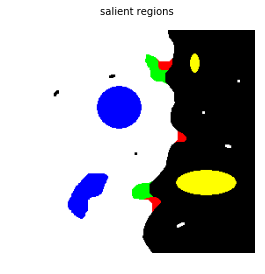

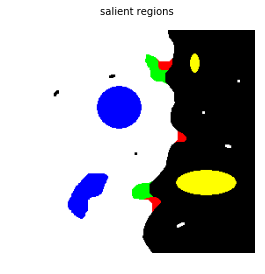

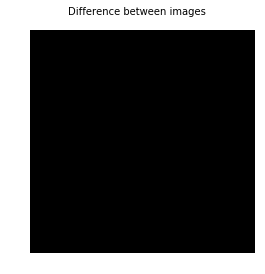

True

In [17]:
elements_visualized = sr.visualize_elements(image, holes=holes_my, islands=islands_my, 
                                            protrusions=prots_my, indentations=indents_my)
trueelements_visualized = sr.visualize_elements(image, 
                                             holes=holes_true, islands=islands_true, 
                                             protrusions=prots_true, indentations=indents_true)
sr.image_diff(elements_visualized, trueelements_visualized)

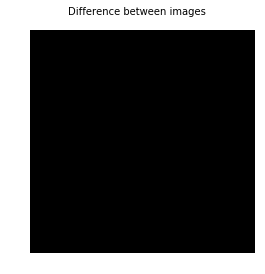

holes are correct: True


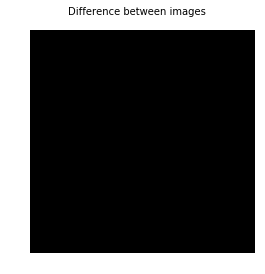

islands are correct: True


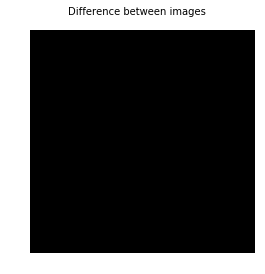

indentations are correct: True


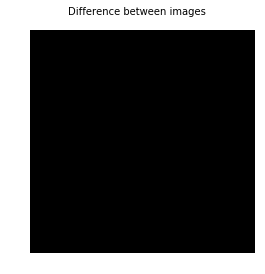

protrusions are correct: True


In [18]:
print('holes are correct:', sr.image_diff(holes_true, holes_my))
print('islands are correct:', sr.image_diff(islands_true, islands_my))
print('indentations are correct:', sr.image_diff(indents_true, indents_my))
print('protrusions are correct:', sr.image_diff(prots_true, prots_my))